<a href="https://colab.research.google.com/github/RishiReal/UCONN-Lab-Work/blob/main/distancebasedalgorhitms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-bio
!pip install git+https://github.com/jeetsukumaran/DendroPy.git
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.7 MB 6.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.6 MB 56.1 MB/s 
  Created wheel for scikit-bio: filename=scikit_bio-0.5.7-cp37-cp37m-linux_x86_64.whl size=2151499 sha256=85548d4262a12542359d362f39af75e84a6fce9cfc65ef122c73da3a02aae04e
  Stored in directory: /root/.cache/pip/wheels/1f/62/74/26fe0d34ceff9bf8a381ef629d9156e47138641c1751452422
  Created wheel for hdmedians: filename=hdmedians-0.14.2-cp37-cp37m-linux_x86_64.whl size=461887 sha256=4f1e9c7a3692435998ca9d5e04690ae50ea9da9a3f5a5a47ffbc63a61dea11c3
  Stored in directory: /root/.cache/pip/whee

In [ ]:
!pip install ete3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 8.9 MB/s 
  Created wheel for ete3: filename=ete3-3.1.2-py3-none-any.whl size=2273013 sha256=b45f73d2630fb36c28d460b8173938b1521bb0e4184f913ed81fd9a2e13df4c6
  Stored in directory: /root/.cache/pip/wheels/17/fd/e2/6ac384d8c2484789304657dde01b96d7ab83f4f1dd96d266df
Successfully built ete3


In [ ]:
#SCIKIT-BIO

import numpy as np
from numpy import genfromtxt
import pandas as pd
import time
from skbio import DistanceMatrix
from skbio.tree import nj

import matplotlib.pyplot as plt

from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import AlignIO

import dendropy

arrx = [10,25,50,100]
arry = []

arr = []
arr2 = ["/content/gdrive/MyDrive/ten.csv","/content/gdrive/MyDrive/twenty.csv", "/content/gdrive/MyDrive/forty.csv", "/content/gdrive/MyDrive/sixty.csv", "/content/gdrive/MyDrive/eighty.csv", "/content/gdrive/MyDrive/hundred.csv", "/content/gdrive/MyDrive/fivehundred.csv", "/content/gdrive/MyDrive/thousand.csv"]

n = 0

for i in range (4):

  c = arrx[i]

  start = time.time() * 1000
  dist_matrix = np.genfromtxt(arr[i], dtype=str,encoding=None, delimiter=",")

  ids = ['cell' + str(j+1) for j in range(c)]

  # actually calling skbio
  dm = DistanceMatrix(dist_matrix, ids)
  tree_str = nj(dm, result_constructor=str)

  end = time.time() * 1000
  t = end - start

  arry.append(t)

arr2y = []

for i in range (4):

  start = time.time() * 1000
  pdm = dendropy.PhylogeneticDistanceMatrix.from_csv(
        src=open(arr2[i]),
        delimiter=",")

  nj_tree = pdm.nj_tree()

  end = time.time() * 1000
  t = end - start

  arr2y.append(t)

arr4y = []

for i in range (4):

  start = time.time() * 1000
  pdm = dendropy.PhylogeneticDistanceMatrix.from_csv(
        src=open(arr2[i]),
        delimiter=",")

  nj_tree = pdm.upgma_tree()

  end = time.time() * 1000
  t = end - start

  arr4y.append(t)


plt.title("Speed of Algorithm Dependent on Matrix Size")
plt.xlabel("Matrix Size")
plt.ylabel("Time (Ms)")

'''

arr3y = [17.003173828125, 18.5009765625, 18.5029296875, 21.0029296875, 25.00244140625, 29.00439453125] #6399.815673828125]
arr5y = [17.00244140625, 18.50146484375, 19.002685546875, 22.0029296875, 24.50390625, 29.0029296875] #6289.2978515625]
arr6y = [16.50244140625, 17.5029296875, 19.001708984375, 21.002685546875, 24.003173828125, 29.0029296875] #6371.81201171875]
arr7y = [0.000000, 1.000000, 2.000000, 5.000000, 8.000000, 15.000000]
arr9y = [14.002685546875, 14.90146484375, 17.004150390625, 18.500732421875, 19.5029296875, 21.502197265625]

'''

plt.plot(arrx, arry, marker='o', label='Scikit-Bio - NJ')
plt.plot(arrx, arr2y, marker='o', label='DendroPy - NJ')
plt.plot(arrx, arr4y, marker='o', label='DendroPy - UPGMA')
plt.plot(arrx, arr3y, marker='o', label='FastME 2.0 - UNJ')
plt.plot(arrx, arr5y, marker='o', label='FastME 2.0 - BioNJ')
plt.plot(arrx, arr6y, marker='o', label='FastME 2.0 - NJ')
plt.plot(arrx, arr7y, marker='o', label='BIONJ')
plt.plot(arrx, arr9y, marker='o', label='ClearCut')

plt.plot()

plt.legend(loc=(1.04,0))
plt.show()

/content/drive/MyDrive/FASTMENJ/NJFASTME2_7.txt
1
/content/drive/MyDrive/FASTMENJ/NJFASTME4_3.txt
3
/content/drive/MyDrive/FASTMENJ/NJFASTME4_5.txt
3
/content/drive/MyDrive/FASTMENJ/NJFASTME4_7.txt
3
/content/drive/MyDrive/FASTMENJ/NJFASTME5_1.txt
4
/content/drive/MyDrive/FASTMENJ/NJFASTME5_2.txt
4
/content/drive/MyDrive/FASTMENJ/NJFASTME5_8.txt
4
/content/drive/MyDrive/FASTMENJ/NJFASTME6_2.txt
5
/content/drive/MyDrive/FASTMENJ/NJFASTME6_3.txt
5
/content/drive/MyDrive/FASTMENJ/NJFASTME6_8.txt
5
/content/drive/MyDrive/FASTMENJ/NJFASTME6_9.txt
5
/content/drive/MyDrive/FASTMENJ/NJFASTME6_10.txt
5
/content/drive/MyDrive/FASTMENJ/NJFASTME7_9.txt
6
/content/drive/MyDrive/FASTMENJ/NJFASTME8_5.txt
7
/content/drive/MyDrive/FASTMENJ/NJFASTME8_9.txt
7


1.0
1.0
0.8571428571428571
0.7142857142857143
0.8333333333333334
0.5714285714285714
0.8571428571428571
1.0
0.42857142857142855
0.8333333333333334
0.6818181818181818
1.0
1.0
0.5454545454545454
0.45454545454545453
0.5454545454545454
0.45454545454545453
1.0
1.0
0.9523809523809523
0.2553191489361702
0.9782608695652174
0.3829787234042553
0.574468085106383
0.9782608695652174
0.6382978723404256
0.5106382978723404
0.5106382978723404
1.0
0.723404255319149
0.5773195876288659
0.41237113402061853
0.5360824742268041
0.5051546391752577
1.0
0.6597938144329897
0.5257731958762887
0.5051546391752577
1.0
0.28865979381443296


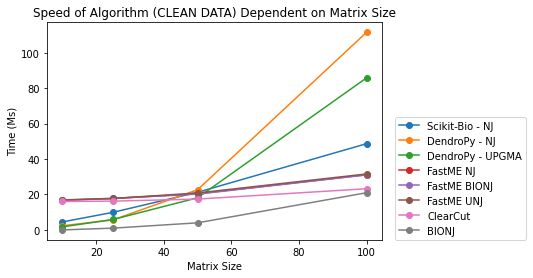

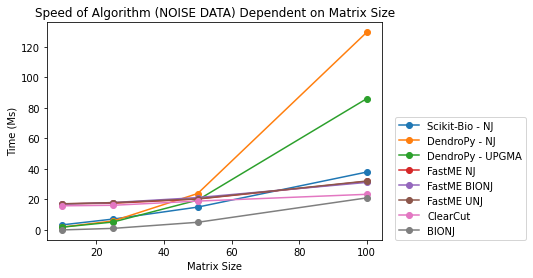

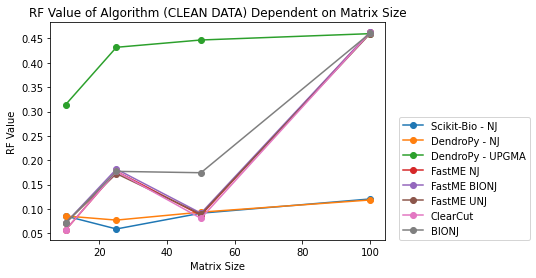

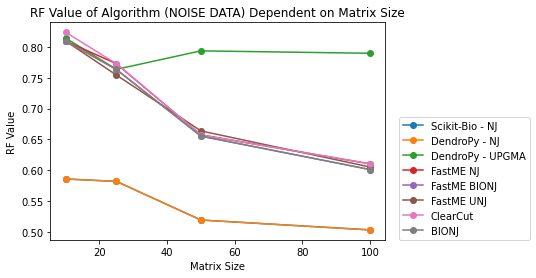

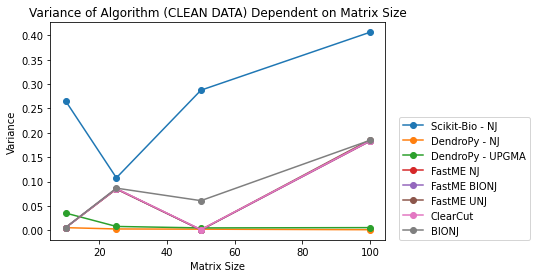

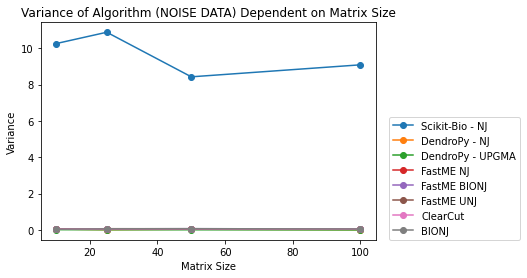

In [ ]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
import time
from skbio import DistanceMatrix
from skbio.tree import nj
from ete3 import Tree
import dendropy
import matplotlib.pyplot as plt

arrx = [10,25,50,100]
avg = 0

timessk = []
rmaxavgssk = []

timessknoise = []
rmaxavgssknoise = []
skstd = []

stuff = []

rfavg = 0
rmaxavg = 0

for i in range (10):

  p = "/content/drive/MyDrive/clean10/" + str(i + 1) + "/dm.csv"

  start = time.time() * 1000
  dist_matrix = np.genfromtxt(p, dtype=str,encoding=None, delimiter=",")

  ids = ["leaf1","leaf10","leaf2","leaf3","leaf4","leaf5","leaf6","leaf7","leaf8","leaf9"]

  # actually calling skbio
  dm = DistanceMatrix(dist_matrix, ids)
  tree_str = nj(dm, result_constructor=str)

  end = time.time() * 1000
  t = end - start

  tr = "/content/drive/MyDrive/rishik_data/clean10/" + str(i + 1) + "/tree.nwk"

  a = Tree(tree_str)
  b = Tree(tr,format=1)

  b.unroot()

  rf, max_rf, common_leaves, parts_t1, parts_t2, discard_t1, discart_t2 = b.robinson_foulds(a,unrooted_trees=True)

  rfavg += rf
  rmaxavg += (rf/max_rf)
  avg += t
  stuff.append(rmaxavg)

avg /= 10
timessk.append(avg)
rmaxavg/=10
rmaxavgssk.append(rmaxavg)

value = 0

for i in range(10):
  value += (stuff[i] - rmaxavgssk[0]) * (stuff[i] - rmaxavgssk[0])
value /= 9
skstd.append(value)

rfavg = 0
rmaxavg = 0
avg = 0

value = 0

stuff.clear()

for i in range (10):

  p = "/content/drive/MyDrive/clean25/" + str(i + 1) + "/dm.csv"

  start = time.time() * 1000
  dist_matrix = np.genfromtxt(p, dtype=str,encoding=None, delimiter=",")

  ids = ["leaf1","leaf10","leaf11","leaf12","leaf13","leaf14","leaf15","leaf16","leaf17","leaf18","leaf19","leaf2","leaf20","leaf21","leaf22","leaf23","leaf24","leaf25","leaf3","leaf4","leaf5","leaf6","leaf7","leaf8","leaf9"]

  # actually calling skbio
  dm = DistanceMatrix(dist_matrix, ids)
  tree_str = nj(dm, result_constructor=str)

  end = time.time() * 1000
  t = end - start

  tr = "/content/drive/MyDrive/rishik_data/clean25/" + str(i + 1) + "/tree.nwk"

  a = Tree(tree_str)
  b = Tree(tr,format=1)

  b.unroot()

  rf, max_rf, common_leaves, parts_t1, parts_t2, discard_t1, discart_t2 = b.robinson_foulds(a,unrooted_trees=True)

  rfavg += rf
  rmaxavg += (rf/max_rf)
  avg += t
  stuff.append(rmaxavg)

avg /= 10
timessk.append(avg)
rmaxavg/=10
rmaxavgssk.append(rmaxavg)

value = 0

for i in range(10):
  value += (stuff[i] - rmaxavgssk[1]) * (stuff[i] - rmaxavgssk[1])
value /= 9
skstd.append(value)

rfavg = 0
rmaxavg = 0
avg = 0

value = 0

stuff.clear()

for i in range (10):

  p = "/content/drive/MyDrive/clean50/" + str(i + 1) + "/dm.csv"

  start = time.time() * 1000
  dist_matrix = np.genfromtxt(p, dtype=str,encoding=None, delimiter=",")

  ids = ["leaf1","leaf10","leaf11","leaf12","leaf13","leaf14","leaf15","leaf16","leaf17","leaf18","leaf19","leaf2","leaf20","leaf21","leaf22","leaf23","leaf24","leaf25","leaf26","leaf27","leaf28","leaf29","leaf3","leaf30","leaf31","leaf32","leaf33","leaf34","leaf35","leaf36","leaf37","leaf38","leaf39","leaf4","leaf40","leaf41","leaf42","leaf43","leaf44","leaf45","leaf46","leaf47","leaf48","leaf49","leaf5","leaf50","leaf6","leaf7","leaf8","leaf9"]

  # actually calling skbio
  dm = DistanceMatrix(dist_matrix, ids)
  tree_str = nj(dm, result_constructor=str)

  end = time.time() * 1000
  t = end - start

  tr = "/content/drive/MyDrive/rishik_data/clean50/" + str(i + 1) + "/tree.nwk"

  a = Tree(tree_str)
  b = Tree(tr,format=1)

  b.unroot()

  rf, max_rf, common_leaves, parts_t1, parts_t2, discard_t1, discart_t2 = b.robinson_foulds(a,unrooted_trees=True)

  rfavg += rf
  rmaxavg += (rf/max_rf)
  avg += t
  stuff.append(rmaxavg)

avg /= 10
timessk.append(avg)
rmaxavg/=10
rmaxavgssk.append(rmaxavg)

value = 0

for i in range(10):
  value += (stuff[i] - rmaxavgssk[2]) * (stuff[i] - rmaxavgssk[2])
value /= 9
skstd.append(value)

rfavg = 0
rmaxavg = 0
avg = 0

value = 0

stuff.clear()

for i in range (10):

  p = "/content/drive/MyDrive/clean100/" + str(i + 1) + "/dm.csv"

  start = time.time() * 1000
  dist_matrix = np.genfromtxt(p, dtype=str,encoding=None, delimiter=",")

  ids = ["leaf1","leaf10","leaf100","leaf11","leaf12","leaf13","leaf14","leaf15","leaf16","leaf17","leaf18","leaf19","leaf2","leaf20","leaf21","leaf22","leaf23","leaf24","leaf25","leaf26","leaf27","leaf28","leaf29","leaf3","leaf30","leaf31","leaf32","leaf33","leaf34","leaf35","leaf36","leaf37","leaf38","leaf39","leaf4","leaf40","leaf41","leaf42","leaf43","leaf44","leaf45","leaf46","leaf47","leaf48","leaf49","leaf5","leaf50","leaf51","leaf52","leaf53","leaf54","leaf55","leaf56","leaf57","leaf58","leaf59","leaf6","leaf60","leaf61","leaf62","leaf63","leaf64","leaf65","leaf66","leaf67","leaf68","leaf69","leaf7","leaf70","leaf71","leaf72","leaf73","leaf74","leaf75","leaf76","leaf77","leaf78","leaf79","leaf8","leaf80","leaf81","leaf82","leaf83","leaf84","leaf85","leaf86","leaf87","leaf88","leaf89","leaf9","leaf90","leaf91","leaf92","leaf93","leaf94","leaf95","leaf96","leaf97","leaf98","leaf99"]

  # actually calling skbio
  dm = DistanceMatrix(dist_matrix, ids)
  tree_str = nj(dm, result_constructor=str)

  end = time.time() * 1000
  t = end - start

  tr = "/content/drive/MyDrive/rishik_data/clean100/" + str(i + 1) + "/tree.nwk"

  a = Tree(tree_str)
  b = Tree(tr,format=1)

  b.unroot()

  rf, max_rf, common_leaves, parts_t1, parts_t2, discard_t1, discart_t2 = b.robinson_foulds(a,unrooted_trees=True)

  rfavg += rf
  rmaxavg += (rf/max_rf)
  avg += t
  stuff.append(rmaxavg)

avg /= 10
timessk.append(avg)
rmaxavg/=10
rmaxavgssk.append(rmaxavg)

value = 0

for i in range(10):
  value += (stuff[i] - rmaxavgssk[3]) * (stuff[i] - rmaxavgssk[3])
value /= 9
skstd.append(value)

rfavg = 0
rmaxavg = 0
avg = 0

value = 0

stuff.clear()

skstdnoise = []

for i in range (10):

  p = "/content/drive/MyDrive/noise10/" + str(i + 1) + "/dm.csv"

  start = time.time() * 1000
  dist_matrix = np.genfromtxt(p, dtype=str,encoding=None, delimiter=",")

  ids = ["leaf1","leaf10","leaf2","leaf3","leaf4","leaf5","leaf6","leaf7","leaf8","leaf9"]

  # actually calling skbio
  dm = DistanceMatrix(dist_matrix, ids)
  tree_str = nj(dm, result_constructor=str)

  end = time.time() * 1000
  t = end - start

  tr = "/content/drive/MyDrive/rishik_data/noise10/" + str(i + 1) + "/tree.nwk"

  a = Tree(tree_str)
  b = Tree(tr,format=1)

  b.unroot()

  rf, max_rf, common_leaves, parts_t1, parts_t2, discard_t1, discart_t2 = b.robinson_foulds(a,unrooted_trees=True)

  rfavg += rf
  rmaxavg += (rf/max_rf)
  avg += t
  stuff.append(rmaxavg)

avg /= 10
timessknoise.append(avg)
rmaxavg/=10
rmaxavgssknoise.append(rmaxavg)

value = 0

for i in range(10):
  value += (stuff[i] - rmaxavgssknoise[0]) * (stuff[i] - rmaxavgssknoise[0])
value /= 9
skstdnoise.append(value)

rfavg = 0
rmaxavg = 0
avg = 0

value = 0

stuff.clear()

for i in range (10):

  p = "/content/drive/MyDrive/noise25/" + str(i + 1) + "/dm.csv"

  start = time.time() * 1000
  dist_matrix = np.genfromtxt(p, dtype=str,encoding=None, delimiter=",")

  ids = ["leaf1","leaf10","leaf11","leaf12","leaf13","leaf14","leaf15","leaf16","leaf17","leaf18","leaf19","leaf2","leaf20","leaf21","leaf22","leaf23","leaf24","leaf25","leaf3","leaf4","leaf5","leaf6","leaf7","leaf8","leaf9"]

  # actually calling skbio
  dm = DistanceMatrix(dist_matrix, ids)
  tree_str = nj(dm, result_constructor=str)

  end = time.time() * 1000
  t = end - start

  tr = "/content/drive/MyDrive/rishik_data/noise25/" + str(i + 1) + "/tree.nwk"

  a = Tree(tree_str)
  b = Tree(tr,format=1)

  b.unroot()

  rf, max_rf, common_leaves, parts_t1, parts_t2, discard_t1, discart_t2 = b.robinson_foulds(a,unrooted_trees=True)

  rfavg += rf
  rmaxavg += (rf/max_rf)
  avg += t
  stuff.append(rmaxavg)

avg /= 10
timessknoise.append(avg)
rmaxavg/=10
rmaxavgssknoise.append(rmaxavg)

value = 0

for i in range(10):
  value += (stuff[i] - rmaxavgssknoise[1]) * (stuff[i] - rmaxavgssknoise[1])
value /= 9
skstdnoise.append(value)

rfavg = 0
rmaxavg = 0
avg = 0

value = 0

stuff.clear()

for i in range (10):

  p = "/content/drive/MyDrive/noise50/" + str(i + 1) + "/dm.csv"

  start = time.time() * 1000
  dist_matrix = np.genfromtxt(p, dtype=str,encoding=None, delimiter=",")

  ids = ["leaf1","leaf10","leaf11","leaf12","leaf13","leaf14","leaf15","leaf16","leaf17","leaf18","leaf19","leaf2","leaf20","leaf21","leaf22","leaf23","leaf24","leaf25","leaf26","leaf27","leaf28","leaf29","leaf3","leaf30","leaf31","leaf32","leaf33","leaf34","leaf35","leaf36","leaf37","leaf38","leaf39","leaf4","leaf40","leaf41","leaf42","leaf43","leaf44","leaf45","leaf46","leaf47","leaf48","leaf49","leaf5","leaf50","leaf6","leaf7","leaf8","leaf9"]

  # actually calling skbio
  dm = DistanceMatrix(dist_matrix, ids)
  tree_str = nj(dm, result_constructor=str)

  end = time.time() * 1000
  t = end - start

  tr = "/content/drive/MyDrive/rishik_data/noise50/" + str(i + 1) + "/tree.nwk"

  a = Tree(tree_str)
  b = Tree(tr,format=1)

  b.unroot()

  rf, max_rf, common_leaves, parts_t1, parts_t2, discard_t1, discart_t2 = b.robinson_foulds(a,unrooted_trees=True)

  rfavg += rf
  rmaxavg += (rf/max_rf)
  avg += t
  stuff.append(rmaxavg)

avg /= 10
timessknoise.append(avg)
rmaxavg/=10
rmaxavgssknoise.append(rmaxavg)

value = 0

for i in range(10):
  value += (stuff[i] - rmaxavgssknoise[2]) * (stuff[i] - rmaxavgssknoise[2])
value /= 9
skstdnoise.append(value)

rfavg = 0
rmaxavg = 0
avg = 0

value = 0

stuff.clear()

for i in range (10):

  p = "/content/drive/MyDrive/noise100/" + str(i + 1) + "/dm.csv"

  start = time.time() * 1000
  dist_matrix = np.genfromtxt(p, dtype=str,encoding=None, delimiter=",")


  ids = ["leaf1","leaf10","leaf100","leaf11","leaf12","leaf13","leaf14","leaf15","leaf16","leaf17","leaf18","leaf19","leaf2","leaf20","leaf21","leaf22","leaf23","leaf24","leaf25","leaf26","leaf27","leaf28","leaf29","leaf3","leaf30","leaf31","leaf32","leaf33","leaf34","leaf35","leaf36","leaf37","leaf38","leaf39","leaf4","leaf40","leaf41","leaf42","leaf43","leaf44","leaf45","leaf46","leaf47","leaf48","leaf49","leaf5","leaf50","leaf51","leaf52","leaf53","leaf54","leaf55","leaf56","leaf57","leaf58","leaf59","leaf6","leaf60","leaf61","leaf62","leaf63","leaf64","leaf65","leaf66","leaf67","leaf68","leaf69","leaf7","leaf70","leaf71","leaf72","leaf73","leaf74","leaf75","leaf76","leaf77","leaf78","leaf79","leaf8","leaf80","leaf81","leaf82","leaf83","leaf84","leaf85","leaf86","leaf87","leaf88","leaf89","leaf9","leaf90","leaf91","leaf92","leaf93","leaf94","leaf95","leaf96","leaf97","leaf98","leaf99"]

  # actually calling skbio
  dm = DistanceMatrix(dist_matrix, ids)
  tree_str = nj(dm, result_constructor=str)

  end = time.time() * 1000
  t = end - start

  tr = "/content/drive/MyDrive/rishik_data/noise100/" + str(i + 1) + "/tree.nwk"

  a = Tree(tree_str)
  b = Tree(tr,format=1)

  b.unroot()

  rf, max_rf, common_leaves, parts_t1, parts_t2, discard_t1, discart_t2 = b.robinson_foulds(a,unrooted_trees=True)

  rfavg += rf
  rmaxavg += (rf/max_rf)
  avg += t
  stuff.append(rmaxavg)

avg /= 10
timessknoise.append(avg)
rmaxavg/=10
rmaxavgssknoise.append(rmaxavg)

value = 0

for i in range(10):
  value += (stuff[i] - rmaxavgssknoise[3]) * (stuff[i] - rmaxavgssknoise[3])
value /= 9
skstdnoise.append(value)

rfavg = 0
rmaxavg = 0
avg = 0

value = 0

stuff.clear()

timesdek = []
rmaxavgsde = []

timesdenoise = []
rmaxavgsdenoise = []

num = "cl10"
n = "clean10"
avg = 0
rm = 0

dendropycleanstd = []
dendropynoisestd = []

for j in range (8):
  for i in range (10):

    if (j == 1):
      num = "cl25"
      n = "clean25"
    elif (j == 2):
      num = "cl50"
      n = "clean50"
    elif (j == 3):
      num = "cl100"
      n = "clean100"
    elif (j == 4):
      num = "ns10"
      n = "noise10"
    elif (j == 5):
      num = "ns25"
      n = "noise25"
    elif (j == 6):
      num = "ns50"
      n = "noise50"
    elif (j == 7):
      num = "ns100"
      n = "noise100"

    p = "/content/drive/MyDrive/weirddata/" + num + " " + str(i + 1) + ".csv"

    start = time.time() * 1000
    pdm = dendropy.PhylogeneticDistanceMatrix.from_csv(
          src=open(p),
          delimiter=",")

    nj_tree = pdm.nj_tree()

    end = time.time() * 1000
    t = end - start

    tree_str = nj_tree.as_string("newick")

    tree_str = tree_str[5:]

    tr = "/content/drive/MyDrive/rishik_data/" + n + "/" + str(i + 1) + "/tree.nwk"
    a = Tree(tree_str)
    b = Tree(tr,format=1)

    b.unroot()

    rf, max_rf, common_leaves, parts_t1, parts_t2, discard_t1, discart_t2 = b.robinson_foulds(a,unrooted_trees=True)

    avg += t
    rm += rf/max_rf

    stuff.append(rf/max_rf)

  avg /= 10
  rm /= 10

  if (j > 3):
    timesdenoise.append(avg)
    rmaxavgsdenoise.append(rm)
    value = 0

    for z in range(10):
      value += (stuff[z] - rmaxavgsdenoise[j - 4]) * (stuff[z] - rmaxavgsdenoise[j - 4])
    value /= 9
    dendropynoisestd.append(value)

    value = 0

    stuff.clear()

  else:
    timesdek.append(avg)
    rmaxavgsde.append(rm)

    value = 0

    for z in range(10):
      value += (stuff[z] - rmaxavgsde[j]) * (stuff[z] - rmaxavgsde[j])
    value /= 9
    dendropycleanstd.append(value)

    value = 0

    stuff.clear()

  avg = 0
  rm = 0


tree_str = ""

timesdekupgma = []
rmaxavgsdeupgma = []

timesdenoiseupgma = []
rmaxavgsdenoiseupgma = []

num = "cl10"
n = "clean10"
avg = 0
rm = 0

dendropycleanstdupgma = []
dendropynoisestdupgma = []

for j in range (8):
  for i in range (10):

    if (j == 1):
      num = "cl25"
      n = "clean25"
    elif (j == 2):
      num = "cl50"
      n = "clean50"
    elif (j == 3):
      num = "cl100"
      n = "clean100"
    elif (j == 4):
      num = "ns10"
      n = "noise10"
    elif (j == 5):
      num = "ns25"
      n = "noise25"
    elif (j == 6):
      num = "ns50"
      n = "noise50"
    elif (j == 7):
      num = "ns100"
      n = "noise100"

    p = "/content/drive/MyDrive/weirddata/" + num + " " + str(i + 1) + ".csv"

    start = time.time() * 1000
    pdm = dendropy.PhylogeneticDistanceMatrix.from_csv(
          src=open(p),
          delimiter=",")

    upgma_tree = pdm.upgma_tree()

    end = time.time() * 1000
    t = end - start

    tree_str = upgma_tree.as_string("newick")

    tree_str = tree_str[5:]

    tr = "/content/drive/MyDrive/rishik_data/" + n + "/" + str(i + 1) + "/tree.nwk"
    a = Tree(tree_str)
    b = Tree(tr,format=1)

    b.unroot()

    rf, max_rf, common_leaves, parts_t1, parts_t2, discard_t1, discart_t2 = b.robinson_foulds(a,unrooted_trees=True)

    avg += t
    rm += rf/max_rf

    stuff.append(rf/max_rf)

  avg /= 10
  rm /= 10

  if (j > 3):
    timesdenoiseupgma.append(avg)
    rmaxavgsdenoiseupgma.append(rm)

    value = 0

    for z in range(10):
      value += (stuff[z] - rmaxavgsdenoiseupgma[j - 4]) * (stuff[z] - rmaxavgsdenoiseupgma[j - 4])
    value /= 9
    dendropynoisestdupgma.append(value)

    value = 0

    stuff.clear()

  else:
    timesdekupgma.append(avg)
    rmaxavgsdeupgma.append(rm)

    value = 0

    for z in range(10):
      value += (stuff[z] - rmaxavgsdeupgma[j]) * (stuff[z] - rmaxavgsdeupgma[j])
    value /= 9
    dendropycleanstdupgma.append(value)

    value = 0

    stuff.clear()

  avg = 0
  rm = 0

#FastME

n = "clean10"

fastmerfavgsclean = []
fastmerfavgsnoise = []

fastmeavg = 0

fastmestdclean = []
fastmestdnoise = []

for x in range(8):
  for y in range(10):

    if (x == 1):
      n = "clean25"
    elif (x == 2):
      n = "clean50"
    elif (x == 3):
      n = "clean100"
    elif (x == 4):
      n = "noise10"
    elif (x == 5):
      n = "noise25"
    elif (x == 6):
      n = "noise50"
    elif (x == 7):
      n = "noise100"

    tree_str = "/content/drive/MyDrive/FASTMENJ/NJFASTME" + str(x+1) + "_" + str(y+1)+".txt"

    tr = "/content/drive/MyDrive/actual/" + n + "/" + str(y + 1) + "/tree.nwk"
    a = Tree(tree_str)
    b = Tree(tr,format=1)

    b.unroot()

    rf, max_rf, common_leaves, parts_t1, parts_t2, discard_t1, discart_t2 = b.robinson_foulds(a,unrooted_trees=True)

    stuff.append(rf/max_rf)

    fastmeavg += rf/max_rf

  if (x < 4):
    fastmerfavgsclean.append(fastmeavg/10)
    fastmeavg = 0

    value = 0

    for z in range(10):
      value += (stuff[z] - fastmerfavgsclean[x]) * (stuff[z] - fastmerfavgsclean[x])
    value /= 9
    fastmestdclean.append(value)

    value = 0

    stuff.clear()


  else:
    fastmerfavgsnoise.append(fastmeavg/10)
    fastmeavg = 0

    value = 0

    for z in range(10):
      value += (stuff[z] - fastmerfavgsnoise[x - 4]) * (stuff[z] - fastmerfavgsnoise[x - 4])
    value /= 9
    fastmestdnoise.append(value)

    value = 0

    stuff.clear()

fastmespeedsclean = [16.702099609375, 17.70224609375, 20.402587890625, 31.1540283203125]
fastmespeedsnoise = [17.1020751953125, 17.502294921875, 20.2525390625, 31.8541259765625]

fastmebionjrfavgsclean = []
fastmebionjrfavgsnoise = []

fastmeavg = 0

n = "clean10"

# LEFT OFF HERE

fastmebionjstdclean = []
fastmebionjstdnoise = []

for x in range(8):
  for y in range(10):

    if (x == 1):
      n = "clean25"
    elif (x == 2):
      n = "clean50"
    elif (x == 3):
      n = "clean100"
    elif (x == 4):
      n = "noise10"
    elif (x == 5):
      n = "noise25"
    elif (x == 6):
      n = "noise50"
    elif (x == 7):
      n = "noise100"

    tree_str = "/content/drive/MyDrive/FASTMEBIONJ/BIONJFASTME" + str(x+1) + "_" + str(y+1)+".txt"

    tr = "/content/drive/MyDrive/actual/" + n + "/" + str(y + 1) + "/tree.nwk"
    a = Tree(tree_str)
    b = Tree(tr,format=1)

    b.unroot()

    rf, max_rf, common_leaves, parts_t1, parts_t2, discard_t1, discart_t2 = b.robinson_foulds(a,unrooted_trees=True)

    stuff.append(rf/max_rf)

    fastmeavg += rf/max_rf

  if (x < 4):
    fastmebionjrfavgsclean.append(fastmeavg/10)
    fastmeavg = 0

    value = 0

    for z in range(10):
      value += (stuff[z] - fastmebionjrfavgsclean[x]) * (stuff[z] - fastmebionjrfavgsclean[x])
    value /= 9
    fastmebionjstdclean.append(value)
    value = 0

    stuff.clear()

  else:
    fastmebionjrfavgsnoise.append(fastmeavg/10)
    fastmeavg = 0

    value = 0

    for z in range(10):
      value += (stuff[z] - fastmebionjrfavgsnoise[x - 4]) * (stuff[z] - fastmebionjrfavgsnoise[x - 4])
    value /= 9
    fastmebionjstdnoise.append(value)
    value = 0

    stuff.clear()

fastmeBIONJspeedsclean = [16.7521728515625, 17.852294921875, 20.2025390625, 31.0539306640625]
fastmeBIONJspeedsnoise = [16.8521728515625, 17.9523193359375, 21.2027099609375, 31.15390625]

fastmeunjrfavgsclean = []
fastmeunjrfavgsnoise = []

n = "clean10"
fastmeavg = 0

fastmeunjstdclean = []
fastmeunjstdnoise = []

for x in range(8):
  for y in range(10):

    if (x == 1):
      n = "clean25"
    elif (x == 2):
      n = "clean50"
    elif (x == 3):
      n = "clean100"
    elif (x == 4):
      n = "noise10"
    elif (x == 5):
      n = "noise25"
    elif (x == 6):
      n = "noise50"
    elif (x == 7):
      n = "noise100"

    tree_str = "/content/drive/MyDrive/UNJFASTME/UNJFASTME" + str(x+1) + "_" + str(y+1)+".txt"

    tr = "/content/drive/MyDrive/actual/" + n + "/" + str(y + 1) + "/tree.nwk"
    a = Tree(tree_str)
    b = Tree(tr,format=1)

    b.unroot()

    rf, max_rf, common_leaves, parts_t1, parts_t2, discard_t1, discart_t2 = b.robinson_foulds(a,unrooted_trees=True)

    stuff.append(rf/max_rf)

    fastmeavg += rf/max_rf

  if (x < 4):
    fastmeunjrfavgsclean.append(fastmeavg/10)
    fastmeavg = 0

    value = 0

    for z in range(10):
      value += (stuff[z] - fastmeunjrfavgsclean[x]) * (stuff[z] - fastmeunjrfavgsclean[x])
    value /= 9
    fastmeunjstdclean.append(value)
    value = 0

    stuff.clear()

  else:
    fastmeunjrfavgsnoise.append(fastmeavg/10)
    fastmeavg = 0

    value = 0

    for z in range(10):
      value += (stuff[z] - fastmeunjrfavgsnoise[x - 4]) * (stuff[z] - fastmeunjrfavgsnoise[x - 4])
    value /= 9
    fastmeunjstdnoise.append(value)
    value = 0

    stuff.clear()


fastmeUNJspeedsclean = [16.9522705078125, 17.752294921875, 20.8525390625, 31.6040771484375]
fastmeUNJspeedsnoise = [17.152294921875, 17.9022216796875, 20.402685546875, 32.05400390625]

clearcutcleanrf = []
clearcutnoiserf = []
fastmeavg = 0
n = "clean10"

clearcutstdclean = []
clearcutstdnoise = []

for x in range(8):
  for y in range(10):

    if (x == 1):
      n = "clean25"
    elif (x == 2):
      n = "clean50"
    elif (x == 3):
      n = "clean100"
    elif (x == 4):
      n = "noise10"
    elif (x == 5):
      n = "noise25"
    elif (x == 6):
      n = "noise50"
    elif (x == 7):
      n = "noise100"

    tree_str = "/content/drive/MyDrive/cleacut/clearcut" + str(x+1) + "_" + str(y+1)+".txt"

    tr = "/content/drive/MyDrive/actual/" + n + "/" + str(y + 1) + "/tree.nwk"

    a = Tree(tree_str)
    b = Tree(tr,format=1)

    b.unroot()

    rf, max_rf, common_leaves, parts_t1, parts_t2, discard_t1, discart_t2 = b.robinson_foulds(a,unrooted_trees=True)
    stuff.append(rf/max_rf)
    fastmeavg += rf/max_rf

  if (x < 4):
    clearcutcleanrf.append(fastmeavg/10)
    fastmeavg = 0

    value = 0

    for z in range(10):
      value += (stuff[z] - clearcutcleanrf[x]) * (stuff[z] - clearcutcleanrf[x])
    value /= 9
    clearcutstdclean.append(value)
    value = 0

    stuff.clear()
  else:
    clearcutnoiserf.append(fastmeavg/10)
    fastmeavg = 0

    value = 0

    for z in range(10):
      value += (stuff[z] - clearcutnoiserf[x - 4]) * (stuff[z] - clearcutnoiserf[x - 4])
    value /= 9
    clearcutstdnoise.append(value)
    value = 0

    stuff.clear()

clearcutcleanspeed = [16.0520263671875, 16.2521240234375, 17.40224609375, 23.2529296875]
clearcutnoisepeed = [15.8020751953125, 16.1520751953125, 18.902392578125, 23.3526123046875]

BIONJcleanrf = []
BIONJnoiserf = []
fastmeavg = 0

BIONJstdclean = []
BIONJstdnoise = []

n = "clean10"

for x in range(8):
  for y in range(10):

    if (x == 1):
      n = "clean25"
    elif (x == 2):
      n = "clean50"
    elif (x == 3):
      n = "clean100"
    elif (x == 4):
      n = "noise10"
    elif (x == 5):
      n = "noise25"
    elif (x == 6):
      n = "noise50"
    elif (x == 7):
      n = "noise100"

    tree_str = "/content/drive/MyDrive/BIONJ/BIONJ" + str(x+1) + "_" + str(y+1)+".tre"

    tr = "/content/drive/MyDrive/rishik_data/" + n + "/" + str(y + 1) + "/tree.nwk"

    a = Tree(tree_str)
    b = Tree(tr,format=1)

    b.unroot()

    rf, max_rf, common_leaves, parts_t1, parts_t2, discard_t1, discart_t2 = b.robinson_foulds(a,unrooted_trees=True)
    stuff.append(rf/max_rf)


    fastmeavg += rf/max_rf

  if (x < 4):
    BIONJcleanrf.append(fastmeavg/10)
    fastmeavg = 0

    value = 0

    for z in range(10):
      value += (stuff[z] - BIONJcleanrf[x]) * (stuff[z] - BIONJcleanrf[x])
    value /= 9
    BIONJstdclean.append(value)
    value = 0

    stuff.clear()

  else:
    BIONJnoiserf.append(fastmeavg/10)
    fastmeavg = 0

    value = 0

    for z in range(10):
      value += (stuff[z] - BIONJnoiserf[x - 4]) * (stuff[z] - BIONJnoiserf[x - 4])
    value /= 9
    BIONJstdnoise.append(value)
    value = 0

    stuff.clear()

BIONJcleanspeed = [0.000000 ,1.000000 ,4.000000, 21.000000]
BIONJnoisepeed = [0.000000, 1.000000, 5.000000 ,21.000000]


plt.title("Speed of Algorithm (CLEAN DATA) Dependent on Matrix Size")
plt.xlabel("Matrix Size")
plt.ylabel("Time (Ms)")
plt.plot(arrx, timessk, marker='o', label='Scikit-Bio - NJ')
plt.plot(arrx, timesdek, marker='o', label='DendroPy - NJ')
plt.plot(arrx, timesdekupgma, marker='o', label='DendroPy - UPGMA')
plt.plot(arrx, fastmespeedsclean, marker='o', label='FastME NJ')
plt.plot(arrx, fastmeBIONJspeedsclean, marker='o', label='FastME BIONJ')
plt.plot(arrx, fastmeUNJspeedsclean, marker='o', label='FastME UNJ')
plt.plot(arrx, clearcutcleanspeed, marker='o', label='ClearCut')
plt.plot(arrx, BIONJcleanspeed, marker='o', label='BIONJ')

plt.plot()

plt.legend(loc=(1.04,0))
plt.show()

plt.title("Speed of Algorithm (NOISE DATA) Dependent on Matrix Size")
plt.xlabel("Matrix Size")
plt.ylabel("Time (Ms)")
plt.plot(arrx, timessknoise, marker='o', label='Scikit-Bio - NJ')
plt.plot(arrx, timesdenoise, marker='o', label='DendroPy - NJ')
plt.plot(arrx, timesdenoiseupgma, marker='o', label='DendroPy - UPGMA')
plt.plot(arrx, fastmespeedsnoise, marker='o', label='FastME NJ')
plt.plot(arrx, fastmeBIONJspeedsnoise, marker='o', label='FastME BIONJ')
plt.plot(arrx, fastmeUNJspeedsnoise, marker='o', label='FastME UNJ')
plt.plot(arrx, clearcutnoisepeed, marker='o', label='ClearCut')
plt.plot(arrx, BIONJnoisepeed, marker='o', label='BIONJ')

plt.plot()

plt.legend(loc=(1.04,0))
plt.show()

plt.title("RF Value of Algorithm (CLEAN DATA) Dependent on Matrix Size")
plt.xlabel("Matrix Size")
plt.ylabel("RF Value")
plt.plot(arrx, rmaxavgssk, marker='o', label='Scikit-Bio - NJ')
plt.plot(arrx, rmaxavgsde, marker='o', label='DendroPy - NJ')
plt.plot(arrx, rmaxavgsdeupgma, marker='o', label='DendroPy - UPGMA')
plt.plot(arrx, fastmerfavgsclean, marker='o', label='FastME NJ')
plt.plot(arrx, fastmebionjrfavgsclean, marker='o', label='FastME BIONJ')
plt.plot(arrx, fastmeunjrfavgsclean, marker='o', label='FastME UNJ')
plt.plot(arrx, clearcutcleanrf, marker='o', label='ClearCut')
plt.plot(arrx, BIONJcleanrf, marker='o', label='BIONJ')
plt.plot()

plt.legend(loc=(1.04,0))
plt.show()

plt.title("RF Value of Algorithm (NOISE DATA) Dependent on Matrix Size")
plt.xlabel("Matrix Size")
plt.ylabel("RF Value")
plt.plot(arrx, rmaxavgssknoise, marker='o', label='Scikit-Bio - NJ')
plt.plot(arrx, rmaxavgsdenoise, marker='o', label='DendroPy - NJ')
plt.plot(arrx, rmaxavgsdenoiseupgma, marker='o', label='DendroPy - UPGMA')
plt.plot(arrx, fastmerfavgsnoise, marker='o', label='FastME NJ')
plt.plot(arrx, fastmebionjrfavgsnoise, marker='o', label='FastME BIONJ')
plt.plot(arrx, fastmeunjrfavgsnoise, marker='o', label='FastME UNJ')
plt.plot(arrx, clearcutnoiserf, marker='o', label='ClearCut')
plt.plot(arrx, BIONJnoiserf, marker='o', label='BIONJ')
plt.plot()

plt.legend(loc=(1.04,0))
plt.show()

plt.title("Variance of Algorithm (CLEAN DATA) Dependent on Matrix Size")
plt.xlabel("Matrix Size")
plt.ylabel("Variance")
plt.plot(arrx, skstd, marker='o', label='Scikit-Bio - NJ')
plt.plot(arrx, dendropycleanstd, marker='o', label='DendroPy - NJ')
plt.plot(arrx, dendropycleanstdupgma, marker='o', label='DendroPy - UPGMA')
plt.plot(arrx, fastmestdclean, marker='o', label='FastME NJ')
plt.plot(arrx, fastmebionjstdclean, marker='o', label='FastME BIONJ')
plt.plot(arrx, fastmeunjstdclean, marker='o', label='FastME UNJ')
plt.plot(arrx, clearcutstdclean, marker='o', label='ClearCut')
plt.plot(arrx, BIONJstdclean, marker='o', label='BIONJ')
plt.plot()

plt.legend(loc=(1.04,0))
plt.show()

plt.title("Variance of Algorithm (NOISE DATA) Dependent on Matrix Size")
plt.xlabel("Matrix Size")
plt.ylabel("Variance")
plt.plot(arrx, skstdnoise, marker='o', label='Scikit-Bio - NJ')
plt.plot(arrx, dendropynoisestd, marker='o', label='DendroPy - NJ')
plt.plot(arrx, dendropynoisestdupgma, marker='o', label='DendroPy - UPGMA')
plt.plot(arrx, fastmestdnoise, marker='o', label='FastME NJ')
plt.plot(arrx, fastmebionjstdnoise, marker='o', label='FastME BIONJ')
plt.plot(arrx, fastmeunjstdnoise, marker='o', label='FastME UNJ')
plt.plot(arrx, clearcutstdnoise, marker='o', label='ClearCut')
plt.plot(arrx, BIONJstdnoise, marker='o', label='BIONJ')
plt.plot()

plt.legend(loc=(1.04,0))
plt.show()

In [ ]:
import matplotlib.pyplot as plt

from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import AlignIO
import time
import dendropy
from ete3 import Tree

timesdek = []
rmaxavgsde = []

timesdenoise = []
rmaxavgsdenoise = []

num = "cl10"
n = "clean10"
avg = 0
rm = 0

for j in range (8):
  for i in range (10):

    if (j == 1):
      num = "cl25"
      n = "clean25"
    elif (j == 2):
      num = "cl50"
      n = "clean50"
    elif (j == 3):
      num = "cl100"
      n = "clean100"
    elif (j == 4):
      num = "ns10"
      n = "noise10"
    elif (j == 5):
      num = "ns25"
      n = "noise25"
    elif (j == 6):
      num = "ns50"
      n = "noise50"
    elif (j == 7):
      num = "ns100"
      n = "noise100"

    p = "/content/drive/MyDrive/weirddata/" + num + " " + str(i + 1) + ".csv"

    start = time.time() * 1000
    pdm = dendropy.PhylogeneticDistanceMatrix.from_csv(
          src=open(p),
          delimiter=",")

    nj_tree = pdm.nj_tree()

    end = time.time() * 1000
    t = end - start

    tree_str = nj_tree.as_string("newick")

    tree_str = tree_str[5:]

    tr = "/content/drive/MyDrive/rishik_data/" + n + "/" + str(i + 1) + "/tree.nwk"
    a = Tree(tree_str)
    b = Tree(tr,format=1)

    b.unroot()

    rf, max_rf, common_leaves, parts_t1, parts_t2, discard_t1, discart_t2 = b.robinson_foulds(a,unrooted_trees=True)

    avg += t
    rm += rf/max_rf

  avg /= 10
  rm /= 10

  if (j > 3):
    timesdenoise.append(avg)
    rmaxavgsde.append(rm)
  else:
    timesdek.append(avg)
    rmaxavgsdenoise.append(rm)

  avg = 0
  rm = 0

print(timesdek)
print(rmaxavgsde)
print(timesdenoise)
print(rmaxavgsdenoise)


[3.719091796875, 9.689453125, 33.280419921875, 156.58486328125]
[0.5857142857142857, 0.5818181818181818, 0.5191489361702128, 0.5030927835051546]
[3.0982177734375, 9.5825927734375, 31.8464599609375, 157.991650390625]
[0.0857142857142857, 0.07272727272727272, 0.09574468085106383, 0.11958762886597937]


In [ ]:
'''
Sukumaran, J. and Mark T. Holder. 2010.
DendroPy: A Python library for phylogenetic computing.
Bioinformatics 26: 1569-1571.
'''

import dendropy

inputName = input("Enter name of input file: ")
outputName = input("Enter name of output file: ")
algorithm = input("NJ (1) or UPGMA (2): ")

pdm = dendropy.PhylogeneticDistanceMatrix.from_csv(
        src=open(inputName),
        delimiter=",")
if (algorithm == 1):
  tree = pdm.nj_tree()
else:
  tree = pdm.upgma_tree()

f = open(outputName, "w")
f.write(tree.as_string("newick"))
f.close()

Enter name of input file: /content/gdrive/MyDrive/hundred.csv
Enter name of output file: t.txt
NJ (1) or UPGMA (2)1


In [ ]:
'''
@software{skbio2022,
  author = {The scikit-bio development team},
  title = {scikit-bio: A Bioinformatics Library for Data Scientists, Students, and Developers},
  url = {http://scikit-bio.org},
  version = {0.5.7},
  year = {2022},
}
'''

import numpy as np
import pandas as pd
import time

from skbio import DistanceMatrix
from skbio.tree import nj

inputName = input("Enter name of input file: ")
outputName = input("Enter name of output file: ")

dist_matrix = np.genfromtxt(inputName, dtype=str,encoding=None, delimiter=",")

ids = ['cell' + str(i+1) for i in range(len(dist_matrix))]

# actually calling skbio
dm = DistanceMatrix(dist_matrix, ids)
tree_str = nj(dm, result_constructor=str)

f = open(outputName, "w")
f.write(tree_str)
f.close()

KeyboardInterrupt: ignored